# Simulated Annealing
## Introduction
To be continued
## Simulated annealing algorithm and TSP
The [travelling salesman problem (TSP)](https://en.wikipedia.org/wiki/Travelling_salesman_problem) asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?" It is an NP-hard problem in combinatorial optimization, important in operations research and theoretical computer science.

TSP is a special case of the travelling purchaser problem and the vehicle routing problem. 

In [1]:
import random
import math
import copy
import matplotlib.pyplot as plt
% matplotlib notebook

In [2]:
def generateWorld(numOfCities):
    return [(random.random(),random.random()) for i in range(numOfCities)]
def tripDistance(itinerary):
    distance=math.sqrt((itinerary[0][0]-itinerary[-1][0])**2+(itinerary[0][1]-itinerary[-1][1])**2)
    for i in range(len(itinerary)-1):
        distance+=math.sqrt((itinerary[i][0]-itinerary[i+1][0])**2+(itinerary[i][1]-itinerary[i+1][1])**2)
    return distance
def search(cities,temperatureInit,minTemp,decayRate=0.99,interval=100):
    fig, (fa, fb, fc) = plt.subplots(3, 1)

    optSolution=cities[:]
    random.shuffle(optSolution)
    optDistance=tripDistance(optSolution)
    temperature=temperatureInit
    distRecord=[]
    temperatureRecord=[]
    iteration=0
    while temperature>minTemp:
        iteration+=1
        testSolution=copy.deepcopy(optSolution)
        iMin,iMax=sorted(random.sample(range(len(cities)),2))
        testSolution[iMin:iMax+1]=list(reversed(testSolution[iMin:iMax+1]))
        testDistance=tripDistance(testSolution)
        if testDistance<optDistance or random.uniform(0,1)<math.exp(-(testDistance-optDistance)/temperature):
            optSolution=testSolution
            optDistance=testDistance
        distRecord.append(optDistance)
        temperatureRecord.append(temperature)
        temperature*=decayRate
        if (iteration-1)%interval==0:
            cities_x=[city[0] for city in optSolution]+[optSolution[0][0]]
            cities_y=[city[1] for city in optSolution]+[optSolution[0][1]]
            fa.cla()
            fa.scatter(cities_x, cities_y)
            fa.plot(cities_x+[optSolution[0][0]], cities_y+[optSolution[0][1]])
            fb.cla()
            fb.plot(range(len(distRecord)),distRecord)
            fc.cla()
            fc.plot(range(len(temperatureRecord)),temperatureRecord)
            fig.canvas.draw()
    return optSolution,optDistance,distRecord

<IPython.core.display.Javascript object>


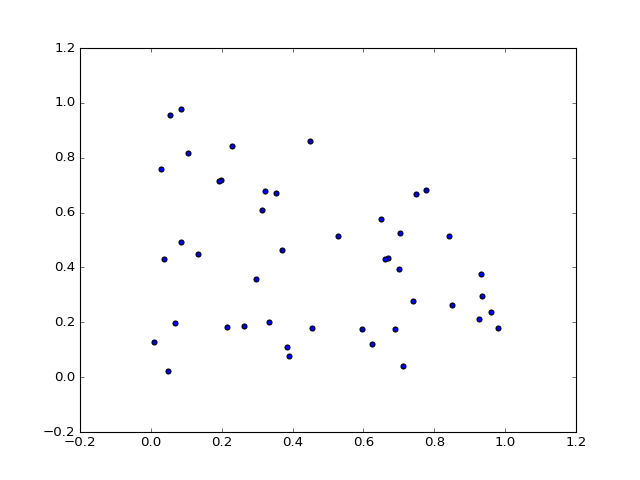

In [3]:
world=generateWorld(45)
plt1 = plt.scatter([city[0] for city in world], [city[1] for city in world])

<IPython.core.display.Javascript object>


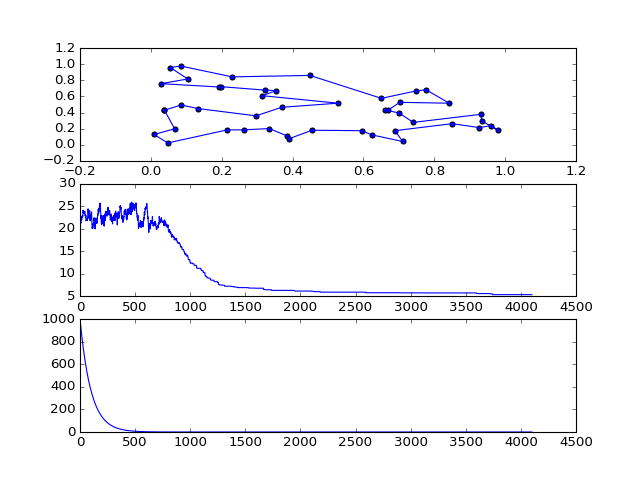

In [4]:
optSolution,optDistance,record=search(world,1000,1e-15)

In [5]:
print("Total distance: {}".format(optDistance))

Total distance: 5.400689811500602
